<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/clustering_and_classification/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This Tutorial Discusses SKLEARN's Multi-layer Perceptron for Classification

From: **Geeks for Geeks**

*Modified: Stephen Coshatt*

<br/>

**References:**

1.   https://www.geeksforgeeks.org/classification-using-sklearn-multi-layer-perceptron/
2. https://www.researchgate.net/figure/Multilayer-Perceptron-Advantages-and-Disadvantages_tbl4_338950098

</br>

#Multi-Layer Perceptron for Classification

A key machine learning method that belongs to the class of artificial neural networks is classification using Multi-Layer Perceptrons (MLP). It is a flexible and effective method for tackling a variety of classification problems, including text classification and picture recognition. Traditional linear classifiers might not be up to the challenge, but MLPs are known for their capacity to model complicated, non-linear relationships in data. In this article, we’ll look at how to use the popular Python machine learning framework scikit-learn to implement categorization using MLPs. [1]

</br>

##Architecture and Working of Multi-Layer Perceptron

A Multi-Layer Perceptron (MLP) is a sort of artificial neural network that has multiple layers of connected nodes (also known as neurons) and is frequently used for different machine-learning tasks, including classification and regression. An overview of an MLP’s structure and operation is provided below:  [1]

###Architecture

* **Input Layer:** The input layer is made up of neurons that directly take in the dataset's features. Each neuron in the input layer represents a feature, and the input layer's total number of neurons is equal to the dataset's total number of features. [1]
* **Hidden Layer:** One or more hidden layers may exist between the input and output layers. The number of neurons in each hidden layer, which is a hyperparameter that you can choose, varies depending on the hidden layer. In order to recognize intricate patterns in the data, these hidden layers are essential. [1]
* **Output Layer:** The final predictions or outputs are generated by the output layer using the data processed in the hidden levels. The task's requirements determine how many neurons are present in the output layer:
  * There is often only one neuron that generates a probability score for binary categorization. [1]
  * There are as many neurons involved in multi-class classification as there are classes, and each neuron generates a probability score for a particular class. [1]
  * One neuron produces the continuous projected value for regression problems. [1]

###Working

* **Initialization:** Set all of the network's neurons' weights (W) and biases (B) to their initial values. Usually, modest random numbers are used as initial values for these parameters. [1]
* **Forward Propagation:** Input data is passed through the network repeatedly during training. Each neuron in a layer takes in the weighted total of the inputs from the layer before it, applies an activation function, and sends the outcome to the layer after it. The model's non-linearity is introduced via the activation functions, which enables it to learn intricate correlations. [1]
* **Loss Calculation:** A loss (error) is computed by comparing the network's output to the actual goal values. Mean Squared Error (MSE) for regression and Cross-Entropy for classification are examples of common loss functions. [1]
* **Backpropagation:** In order to reduce the loss, the network modifies its biases and weights. The backpropagation algorithm accomplishes this by calculating gradients of the loss with respect to each network parameter. Through optimization techniques like Gradient Descent, these gradients are used to update the weights and biases. [1]
* **Training:** The forward propagation, loss estimation, and backpropagation processes are iterated across a number of iterations (epochs) until the model converges to a solution. A hyperparameter that can be modified is the learning rate and the number of iterations. [1]
* **Prediction:** By using forward propagation with the honed weights and biases, the MLP may be trained to make predictions on new, unobserved data.

Although MLPs are well renowned for their capacity to represent complicated relationships in data, they can be sensitive to certain hyperparameters, including the number of hidden layers and neurons, the choice of activation functions, and regularization strategies. For MLPs to operate well, proper hyperparameter adjustment is crucial. [1]

</br>

**Advantages**
*   Can be applied to complex non-linear problems. [2]
*   Works well with large input data. [2]
*   Provides quick prediction after training. [2]
*   The same accuracy ration can be achieved even with smaller data. [2]

**Disadvantages**
*   It is not known to what extent each independent variable is affected by the dependent variable.  Computations are difficult and time consuming. [2]
*   The proper fucntioning of the model depends on the quality of the training. [2]

<br/>

In [1]:
!pip install sktime
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 3.9 MB/s eta 0:00:00


In [2]:
from math import radians
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pathlib import Path

#import streamlit as st

import re
import pytz
from datetime import datetime
from datetime import date

import enum
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay, auc, roc_curve, roc_auc_score

from sklearn.neural_network import MLPClassifier

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# GET TIME SERIES DATASET
# steps 1, 2 - prepare osuleaf dataset (train and new)
from sktime.datasets import load_italy_power_demand

X_train, y_train = load_italy_power_demand(split="train", return_type="numpy2D")
X_test, y_test = load_italy_power_demand(split="test", return_type="numpy2D")

print("shape of X_train ",X_train.shape)
print("shape of y_train ",y_train.shape)
print("shape of X_test ",X_test.shape)
print("shape of y_test ",y_test.shape)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

n_classes = int(np.amax(y_train))
print("number of classes is ",n_classes)

shape of X_train  (67, 24)
shape of y_train  (67,)
shape of X_test  (1029, 24)
shape of y_test  (1029,)
number of classes is  2


In [4]:
# CLASSIFIER GRID SEARCH SETUP

# MULTI-LAYER PERCEPTRON CLASSIFIER
def pipeBuild_MLPClassifier(hidden_layer_sizes=[(100,)],activation=['relu'],solver=['adam'],alpha=[0.0001],batch_size=['auto'],learning_rate=['constant'],random_state=None):
  classifier = MLPClassifier(random_state=random_state)
  pipeline = Pipeline(steps=[('mlp', classifier)])

  params = [{
      'mlp__hidden_layer_sizes': hidden_layer_sizes,
      'mlp__activation': activation,
      'mlp__solver': solver,
      'mlp__alpha': alpha,
      'mlp__batch_size': batch_size,
      'mlp__learning_rate': learning_rate,
  }]
  return pipeline, params

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameter (CV score=-0.029):
{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__batch_size': 'auto', 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}
              precision    recall  f1-score   support

           1       0.95      0.97      0.96       513
           2       0.97      0.95      0.96       516

    accuracy                           0.96      1029
   macro avg       0.96      0.96      0.96      1029
weighted avg       0.96      0.96      0.96      1029



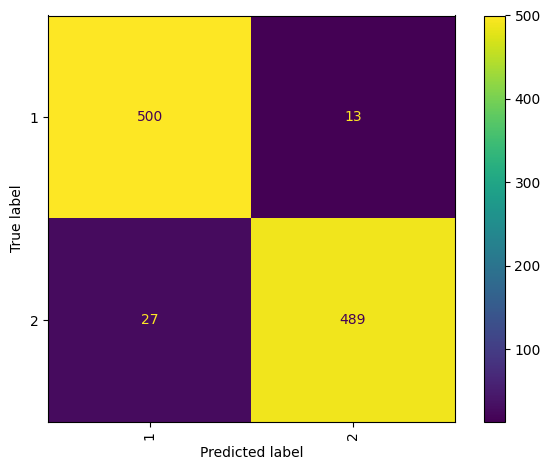

In [5]:
# SETUP & RUN LDA GRIDSEARCH TRAINING & TESTING

mlp = pipeBuild_MLPClassifier(hidden_layer_sizes=[(100,)],activation=['relu'],solver=['adam'],alpha=[0.0001],batch_size=['auto'],learning_rate=['constant'],random_state=None)


names=['Multi-Layer Perceptron']
pipes=[mlp]


samples = np.arange(len(X_train[0,:]))

# iterate over classifiers
for j in range(len(names)):

    today = date.today()
    now = today.strftime("%b-%d-%Y")
    save_file = str(names[j]) + '-' + str(now) + '-HeatMap.png'

    grid_search = GridSearchCV(estimator=pipes[j][0], param_grid=pipes[j][1], scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
    print(grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, xticks_rotation="vertical")

plt.tight_layout()
plt.show()